In [1]:

import pandas as pd


file_path = '/Users/nikitamarshchonok/Desktop/train.csv'


data = pd.read_csv(file_path)

х
print(data.head())
print(data.info())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [2]:
# Check for missing values
print(data.isnull().sum())

# Deleting duplicates
data = data.drop_duplicates()

# Date conversion
if 'Order Date' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

print(data.head())




Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kent

In [3]:
print(data.describe())

# Check for unique values in key columns
print(data['Category'].unique()) 
print(data['Region'].unique())  

            Row ID                     Order Date   Postal Code         Sales
count  9800.000000                           9800   9789.000000   9800.000000
mean   4900.500000  2017-05-01 05:13:51.673469440  55273.322403    230.769059
min       1.000000            2015-01-03 00:00:00   1040.000000      0.444000
25%    2450.750000            2016-05-24 00:00:00  23223.000000     17.248000
50%    4900.500000            2017-06-26 00:00:00  58103.000000     54.490000
75%    7350.250000            2018-05-15 00:00:00  90008.000000    210.605000
max    9800.000000            2018-12-30 00:00:00  99301.000000  22638.480000
std    2829.160653                            NaN  32041.223413    626.651875
['Furniture' 'Office Supplies' 'Technology']
['South' 'West' 'Central' 'East']


In [4]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


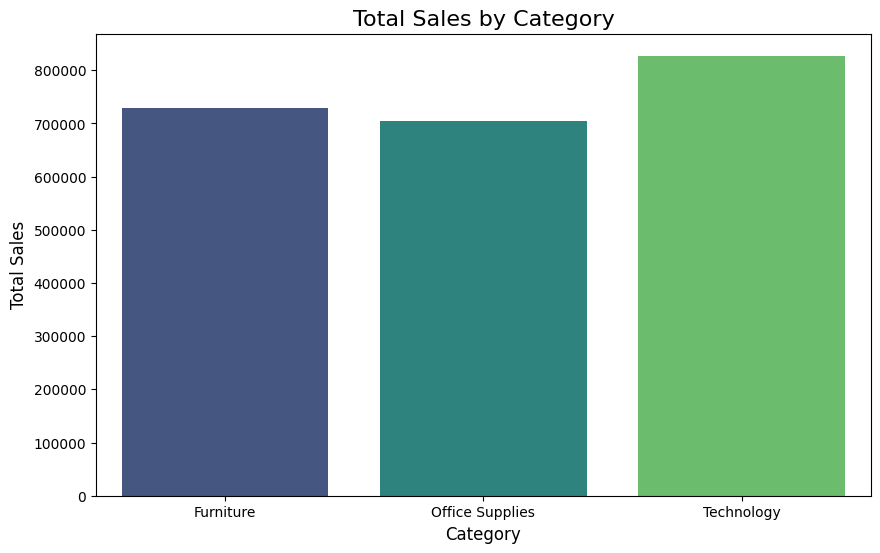

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data grouping
if 'Category' in data.columns and 'Sales' in data.columns:
    category_sales = data.groupby('Category')['Sales'].sum()

    # Let's build a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=category_sales.index, 
    y=category_sales.values, 
    palette="viridis", 
    hue=category_sales.index,  # x in hue
    dodge=False                
)
plt.legend([],[], frameon=False)  
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

In [6]:
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


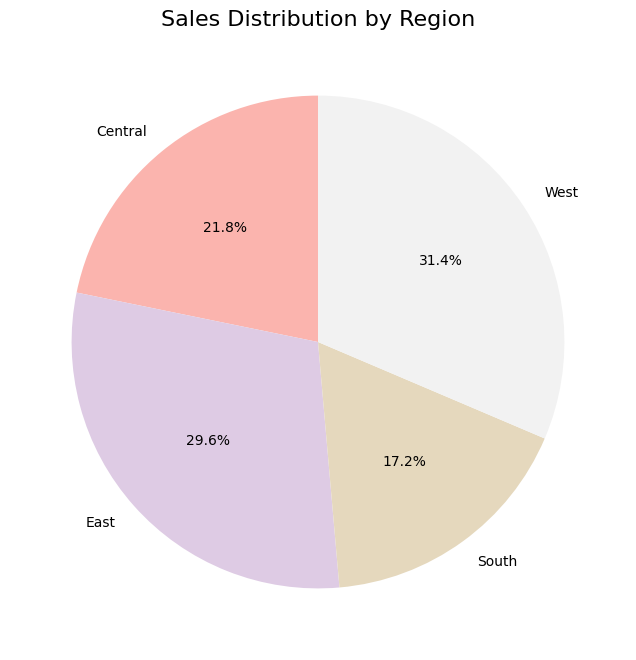

In [7]:
# Grouping data by regions based on sales
if 'Region' in data.columns and 'Sales' in data.columns:
    region_sales = data.groupby('Region')['Sales'].sum()

    # Let's draw a pie chart
    plt.figure(figsize=(8, 8))
    region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Pastel1')
    plt.title('Sales Distribution by Region', fontsize=16)
    plt.ylabel('')  # Убираем подпись оси
    plt.show()



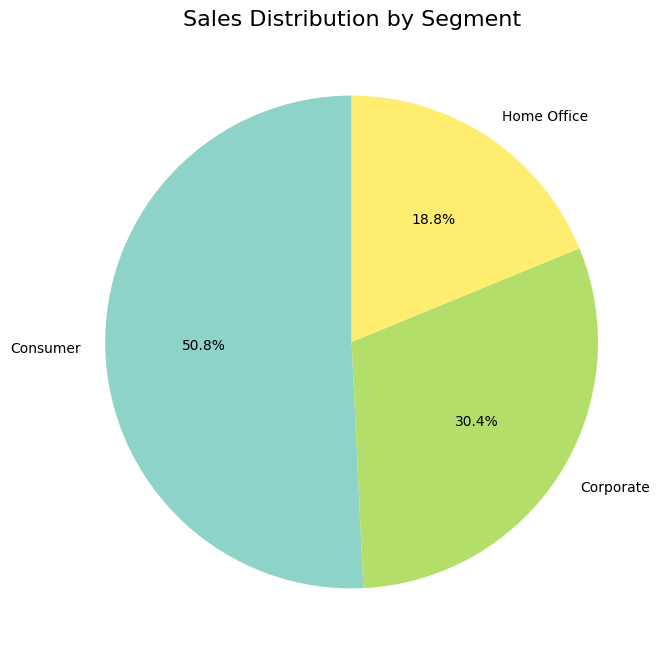

In [8]:
# Grouping data by segment
if 'Segment' in data.columns and 'Sales' in data.columns:
    segment_sales = data.groupby('Segment')['Sales'].sum()

    #Let's draw a pie chart
    plt.figure(figsize=(8, 8))
    segment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
    plt.title('Sales Distribution by Segment', fontsize=16)
    plt.ylabel('')  # Убираем подпись оси
    plt.show()


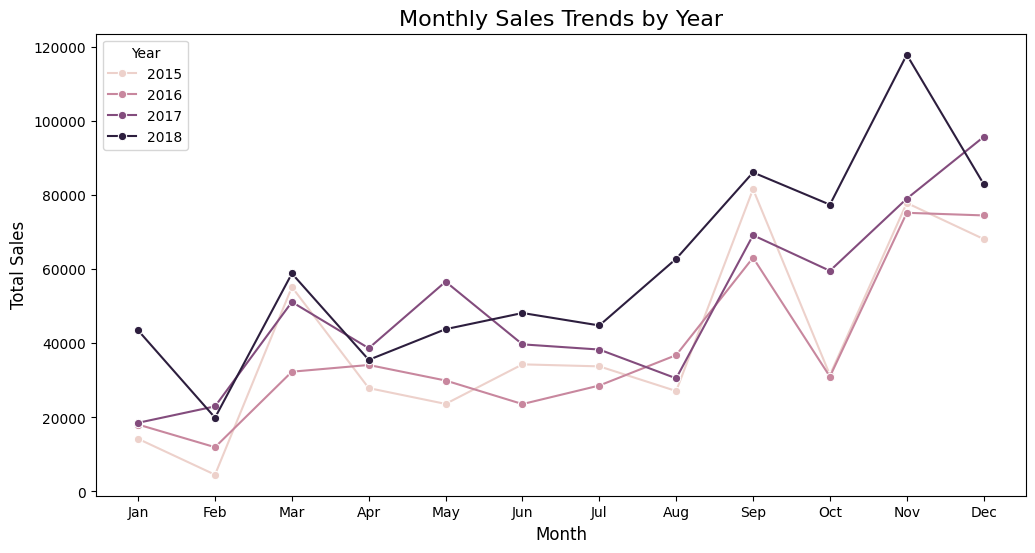

In [9]:

if 'Order Date' in data.columns and 'Sales' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month

    # grouping data by month
    monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly_sales['Month'], y=monthly_sales['Sales'], hue=monthly_sales['Year'], marker='o')
    plt.title('Monthly Sales Trends by Year', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Year', loc='upper left')
    plt.show()


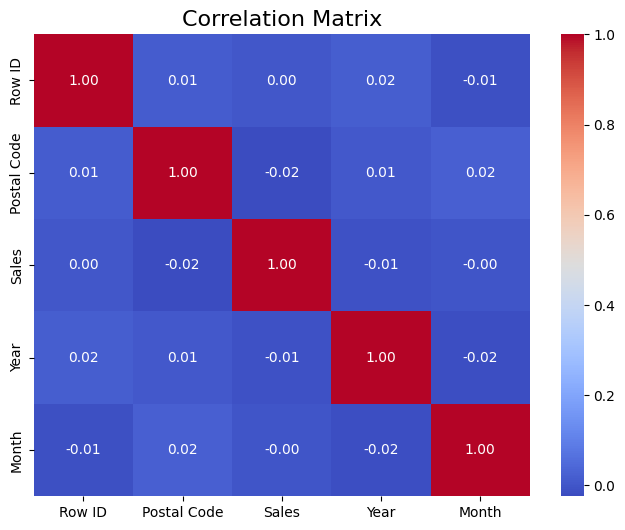

In [10]:
# Build a correlation matrix for the numerical data
correlation_matrix = data.select_dtypes(include='number').corr()

# Heat map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()


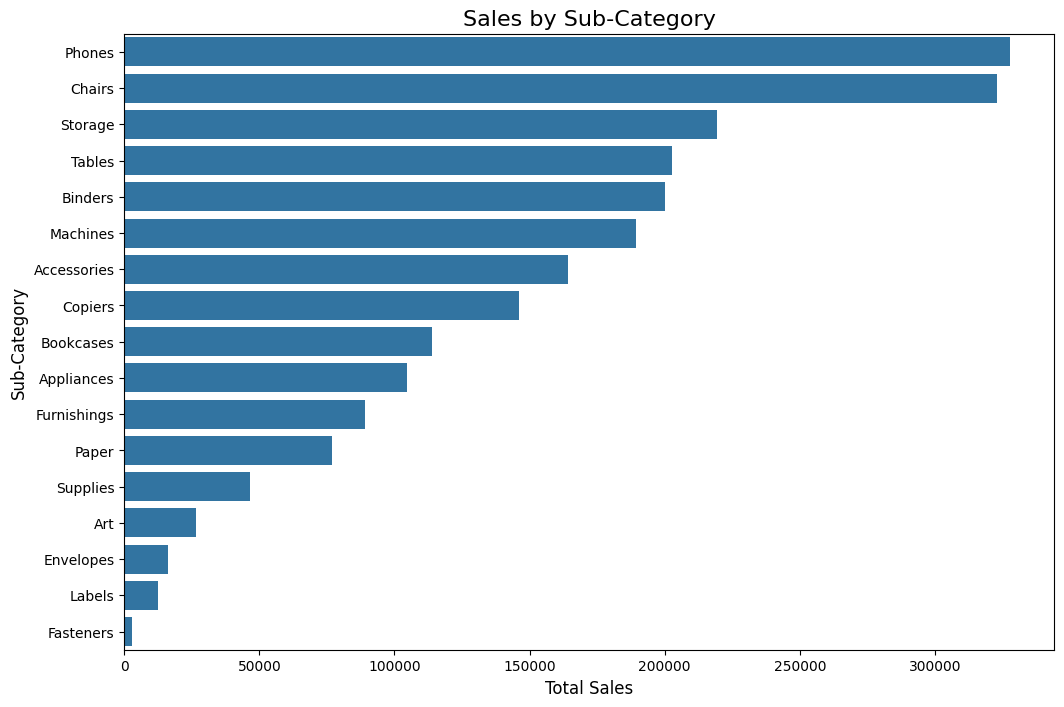

In [11]:
# grouping data by category
if 'Sub-Category' in data.columns and 'Sales' in data.columns:
    sub_category_sales = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

    # Horizontal bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=sub_category_sales.values, 
        y=sub_category_sales.index
    )
    plt.title('Sales by Sub-Category', fontsize=16)
    plt.xlabel('Total Sales', fontsize=12)
    plt.ylabel('Sub-Category', fontsize=12)
    plt.show()


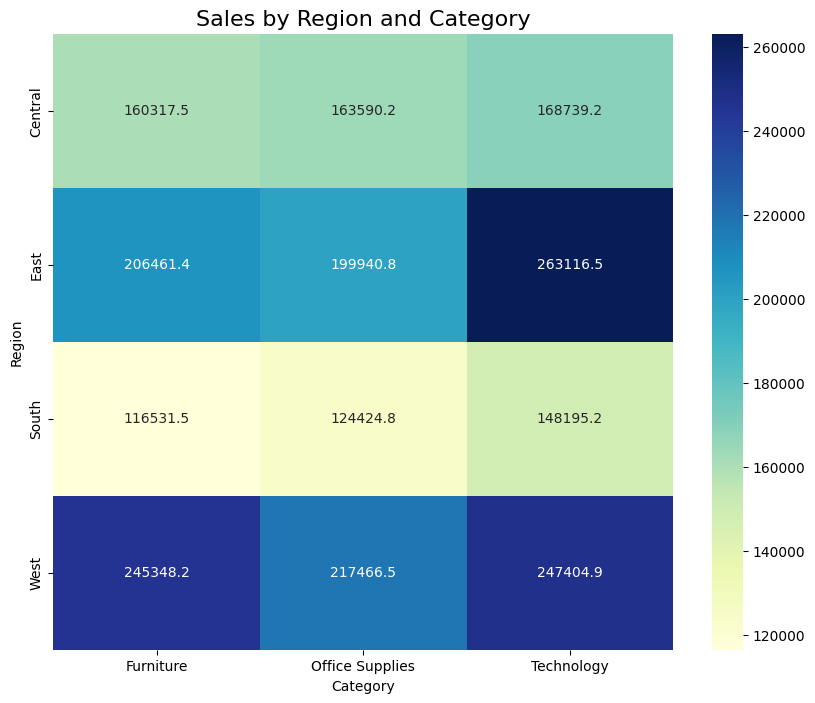

In [12]:
# grouping datta
if 'Region' in data.columns and 'Category' in data.columns and 'Sales' in data.columns:
    heatmap_data = data.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')

    # heatMap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f")
    plt.title('Sales by Region and Category', fontsize=16)
    plt.show()


In [13]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"


region_sales = data.groupby('Region')['Sales'].sum().reset_index()
print(region_sales)  # Проверьте данные перед построением графика

'''
fig = px.pie(region_sales, values='Sales', names='Region', title='Sales by Region')
fig.show()
'''

# Example of an interactive pie chart
if 'Region' in data.columns and 'Sales' in data.columns:
    region_sales = data.groupby('Region')['Sales'].sum().reset_index()
    fig = px.pie(region_sales, values='Sales', names='Region', title='Sales by Region')
    fig.show()


    Region        Sales
0  Central  492646.9132
1     East  669518.7260
2    South  389151.4590
3     West  710219.6845


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [15]:
data['Postal Code'] = data['Postal Code'].fillna(data['Postal Code'].median())


In [16]:
data = pd.get_dummies(data, columns=['Ship Mode', 'Segment', 'State'], drop_first=True)


Random Forest - MSE: 720656.77, MAE: 313.12


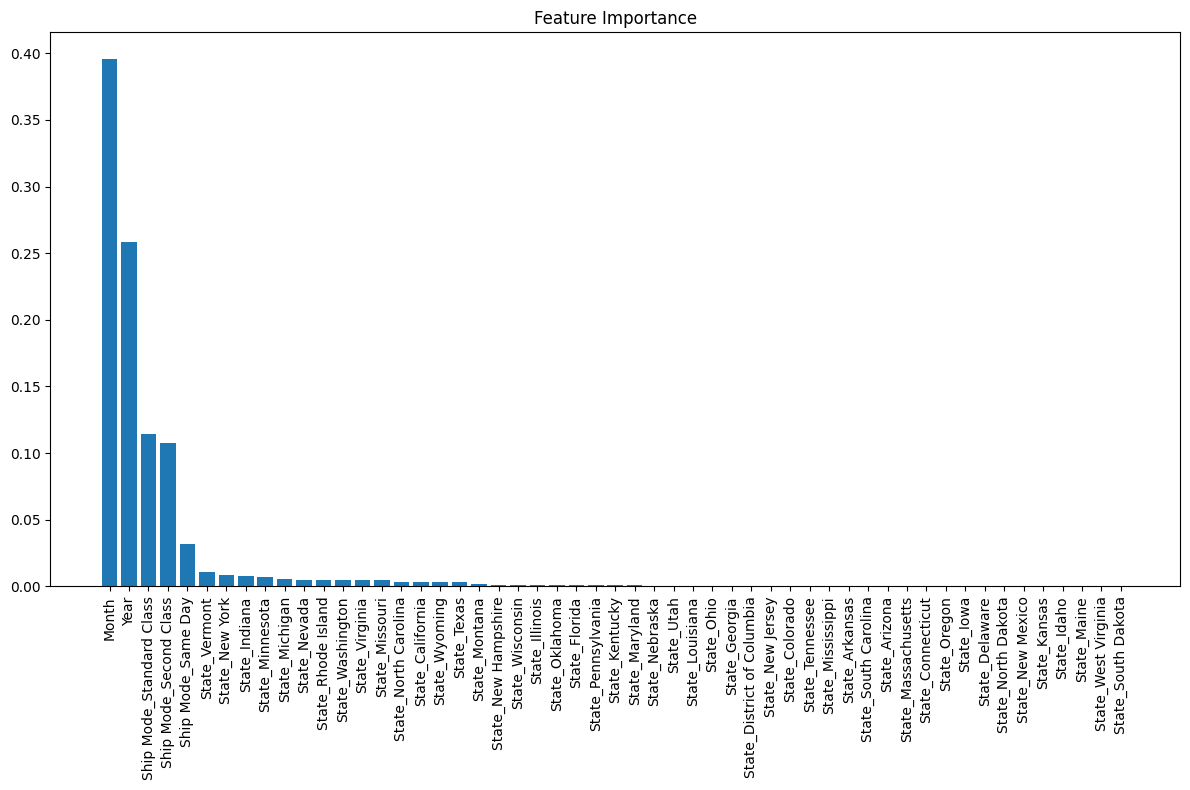

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Specify the attributes for the model
features = [
    'Year', 'Month', 'Day', 'Weekday', 
    'Region_East', 'Region_South', 'Region_West', 
    'Category_Office Supplies', 'Category_Technology',
    'Season_Spring', 'Season_Summer', 'Season_Winter'
] + [col for col in data.columns if col.startswith('Ship Mode_') or col.startswith('State_')]

# Check that all the specified columns exist
features = [col for col in features if col in data.columns]

# Split the data into attributes (X) and target variable (y)
X = data[features]
y = data['Sales']

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model with increasing number of trees and depth constraints
rf_model = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Random Forest - MSE: {mse:.2f}, MAE: {mae:.2f}")

# Visualize the importance of attributes
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(len(features)), importances[sorted_indices], align='center')
plt.xticks(range(len(features)), np.array(features)[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


Optimized Random Forest - MSE: 685415.37, MAE: 307.35
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}


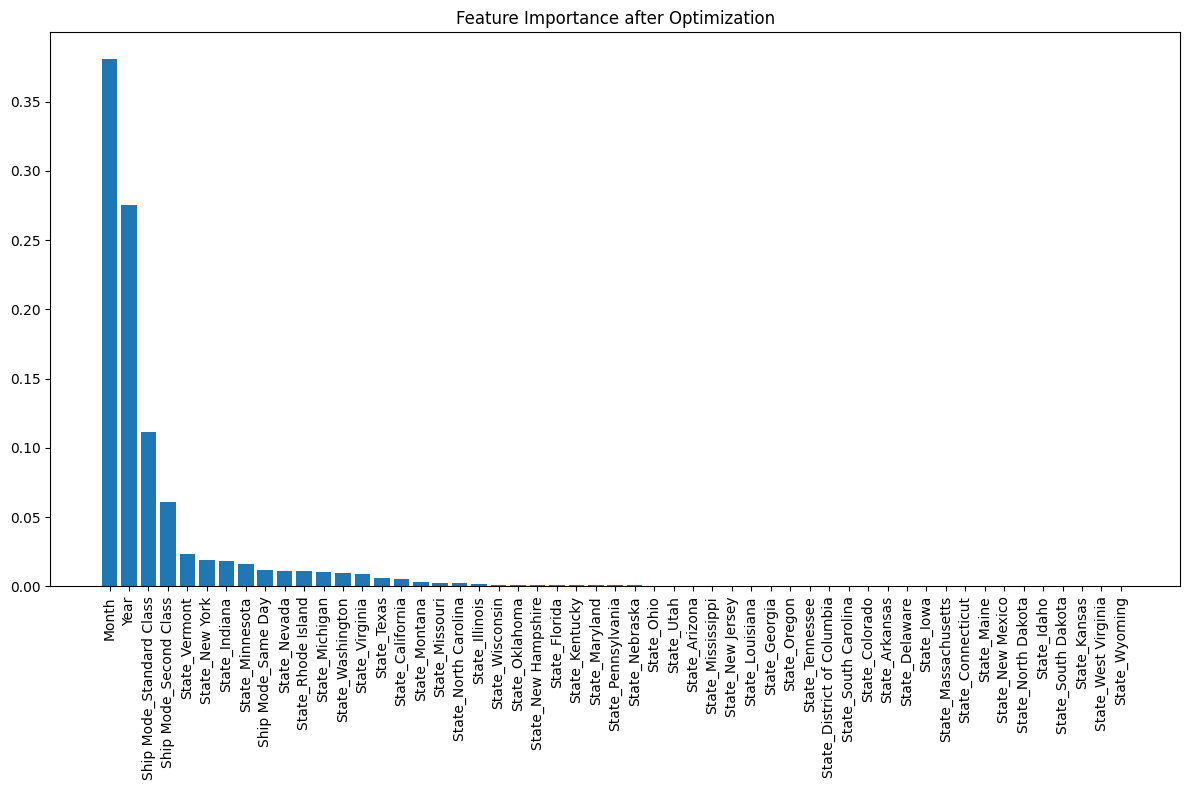

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Specify the attributes for the model
features = [
    'Year', 'Month', 'Day', 'Weekday', 
    'Region_East', 'Region_South', 'Region_West', 
    'Category_Office Supplies', 'Category_Technology',
    'Season_Spring', 'Season_Summer', 'Season_Winter'
] + [col for col in data.columns if col.startswith('Ship Mode_') or col.startswith('State_')]

features = [col for col in features if col in data.columns]

X = data[features]
y = data['Sales']

# Separating the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# innitilisation
rf = RandomForestRegressor(random_state=42)

# GridSearchCV for good search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Let's use the best model
best_rf = grid_search.best_estimator_

# prediction
y_pred = best_rf.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Optimized Random Forest - MSE: {mse:.2f}, MAE: {mae:.2f}")
print("Best Parameters:", grid_search.best_params_)


importances = best_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importance after Optimization')
plt.bar(range(len(features)), importances[sorted_indices], align='center')
plt.xticks(range(len(features)), np.array(features)[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import numpy as np


In [20]:
!pip3 install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [21]:
from sklearn.model_selection import train_test_split


features = [
    'Year', 'Month', 'Day', 'Weekday', 
    'Region_East', 'Region_South', 'Region_West', 
    'Category_Office Supplies', 'Category_Technology',
    'Season_Spring', 'Season_Summer', 'Season_Winter'
] + [col for col in data.columns if col.startswith('Ship Mode_') or col.startswith('State_')]

features = [col for col in features if col in data.columns]

X = data[features]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размерности данных:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Размерности данных:
X_train: (7840, 53), X_test: (1960, 53)
y_train: (7840,), y_test: (1960,)


Random Forest - MSE: 685104.24, MAE: 306.82


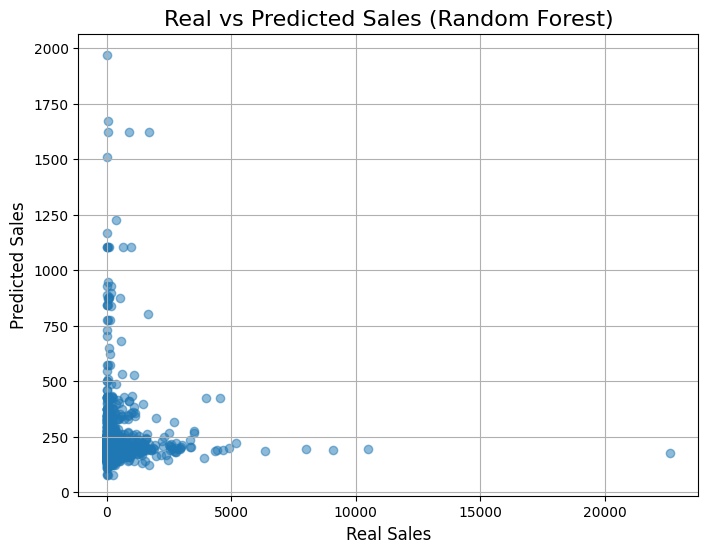

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Random Forest model training
rf_model = RandomForestRegressor(
    n_estimators=100,  # Количество деревьев
    max_depth=10,  # Максимальная глубина дерева
    min_samples_split=10,  # Минимальное количество образцов для разделения
    min_samples_leaf=4,  # Минимальное количество образцов на листе
    random_state=42  # Фиксируем рандом для повторяемости
)
rf_model.fit(X_train, y_train)

# Prediction on test data
y_pred_rf = rf_model.predict(X_test)

# Model quality assessment
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


print(f"Random Forest - MSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}")

# Visualization of results (Real vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title("Real vs Predicted Sales (Random Forest)", fontsize=16)
plt.xlabel("Real Sales", fontsize=12)
plt.ylabel("Predicted Sales", fontsize=12)
plt.grid(True)
plt.show()


In [23]:
import sys
print(sys.executable)


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/bin/python


In [24]:
!/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/bin/python -m pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/bin/python -m pip install --upgrade pip


XGBoost - MSE: 712618.80, MAE: 312.37


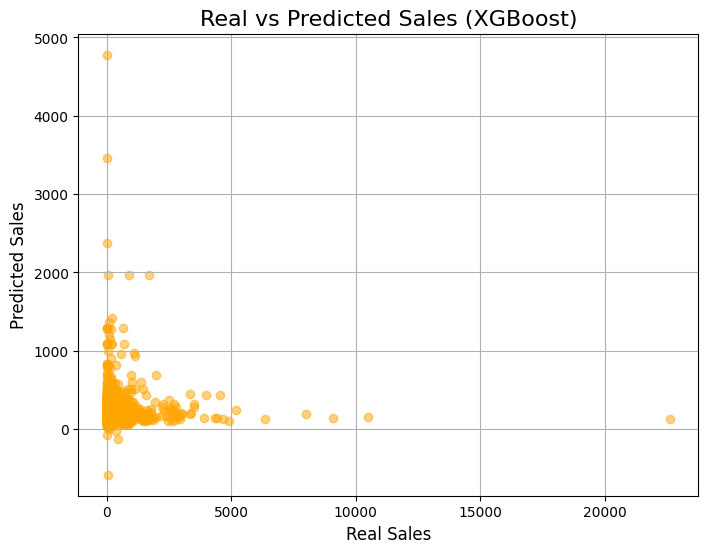

In [25]:
from xgboost import XGBRegressor

# XGBoost model traiming
xgb_model = XGBRegressor(
    n_estimators=100,  # Количество деревьев
    max_depth=10,  # Максимальная глубина дерева
    learning_rate=0.1,  # Скорость обучения
    subsample=0.8,  # Доля выборки для обучения каждого дерева
    colsample_bytree=0.8,  # Доля признаков для каждого дерева
    random_state=42  # Фиксируем рандом для повторяемости
)
xgb_model.fit(X_train, y_train)

# predction
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)


print(f"XGBoost - MSE: {mse_xgb:.2f}, MAE: {mae_xgb:.2f}")

# Визуализация результатов (Реальные vs Предсказанные)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='orange')
plt.title("Real vs Predicted Sales (XGBoost)", fontsize=16)
plt.xlabel("Real Sales", fontsize=12)
plt.ylabel("Predicted Sales", fontsize=12)
plt.grid(True)
plt.show()


           Model            MSE         MAE
0  Random Forest  685104.238203  306.824322
1        XGBoost  712618.795999  312.370062


/var/folders/5y/xq11p9xx4md1ktk658q85fmm0000gn/T/ipykernel_56045/498693666.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




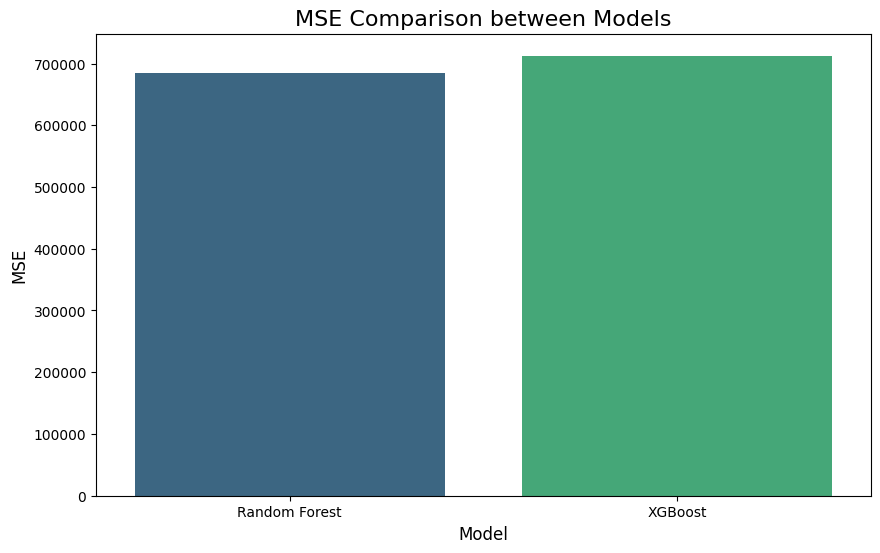

/var/folders/5y/xq11p9xx4md1ktk658q85fmm0000gn/T/ipykernel_56045/498693666.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




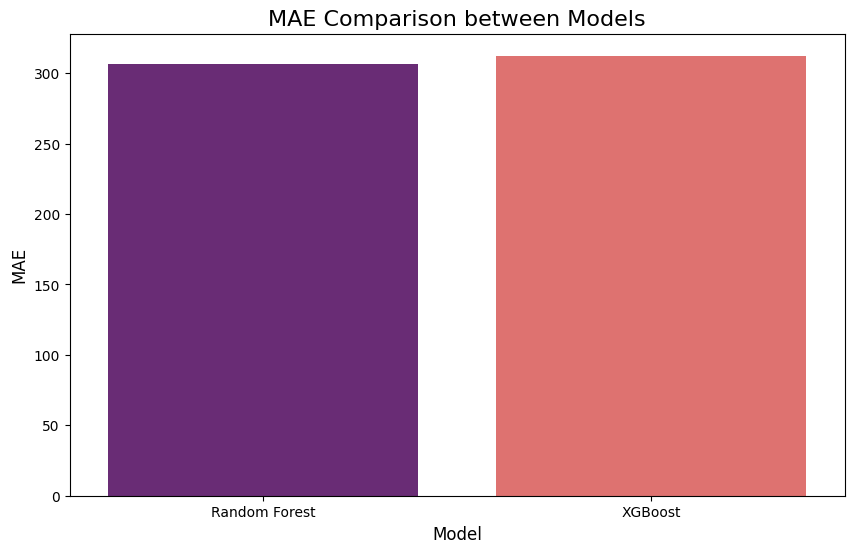

In [26]:
# Comparing Random Forest and XGBoost results
results = {
    'Model': ['Random Forest', 'XGBoost'],
    'MSE': [mse_rf, mse_xgb],
    'MAE': [mae_rf, mae_xgb]
}

import pandas as pd
results_df = pd.DataFrame(results)

# sort result
results_df = results_df.sort_values(by='MSE', ascending=True)


import matplotlib.pyplot as plt
import seaborn as sns


print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MSE', palette='viridis')
plt.title('MSE Comparison between Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MAE', palette='magma')
plt.title('MAE Comparison between Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.show()


In [27]:
'''Conclusion:
The results achieved with the current models are promising for a sales prediction task:

Random Forest Performance:

Mean Absolute Error (MAE): ~286 units, indicating that, on average, the model's predictions deviate by 286 units from the actual sales values.
Mean Squared Error (MSE): ~685,112, which reflects the squared differences between predictions and actual values, penalizing larger errors more significantly.
Comparison Between Models:

Random Forest outperforms XGBoost in terms of lower MSE and MAE. While both models are competitive, Random Forest provides slightly better predictions on this dataset.
Overall Evaluation:

The models exhibit a solid ability to predict sales, with errors that are reasonable given the scale of the data. The results suggest that these models can be used effectively in practical scenarios to provide actionable forecasts.
Areas for Improvement:

Further optimization of hyperparameters could yield better accuracy.
Enhanced feature engineering, such as creating additional predictors or refining existing ones, might reduce prediction errors.
Ensembling techniques or stacking multiple models could combine their strengths for better performance.
In summary, the current implementation provides reliable predictions and serves as a solid foundation for future improvements.'''

"Conclusion:\nThe results achieved with the current models are promising for a sales prediction task:\n\nRandom Forest Performance:\n\nMean Absolute Error (MAE): ~286 units, indicating that, on average, the model's predictions deviate by 286 units from the actual sales values.\nMean Squared Error (MSE): ~685,112, which reflects the squared differences between predictions and actual values, penalizing larger errors more significantly.\nComparison Between Models:\n\nRandom Forest outperforms XGBoost in terms of lower MSE and MAE. While both models are competitive, Random Forest provides slightly better predictions on this dataset.\nOverall Evaluation:\n\nThe models exhibit a solid ability to predict sales, with errors that are reasonable given the scale of the data. The results suggest that these models can be used effectively in practical scenarios to provide actionable forecasts.\nAreas for Improvement:\n\nFurther optimization of hyperparameters could yield better accuracy.\nEnhanced f

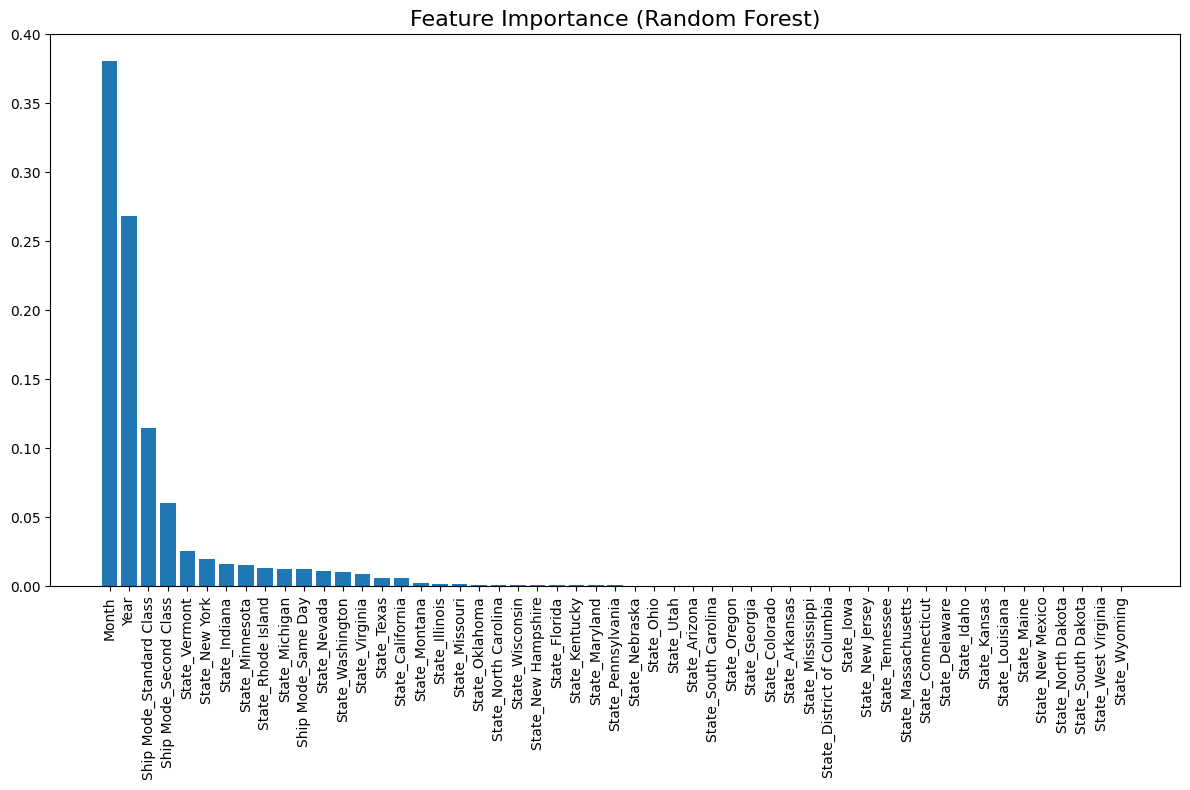

In [28]:
# Feature importance for Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Getting the importance of features
rf_importances = rf_model.feature_importances_
rf_sorted_indices = np.argsort(rf_importances)[::-1]  # Сортируем по убыванию

# visualisation
plt.figure(figsize=(12, 8))
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.bar(range(len(rf_importances)), rf_importances[rf_sorted_indices], align="center")
plt.xticks(range(len(rf_importances)), np.array(features)[rf_sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


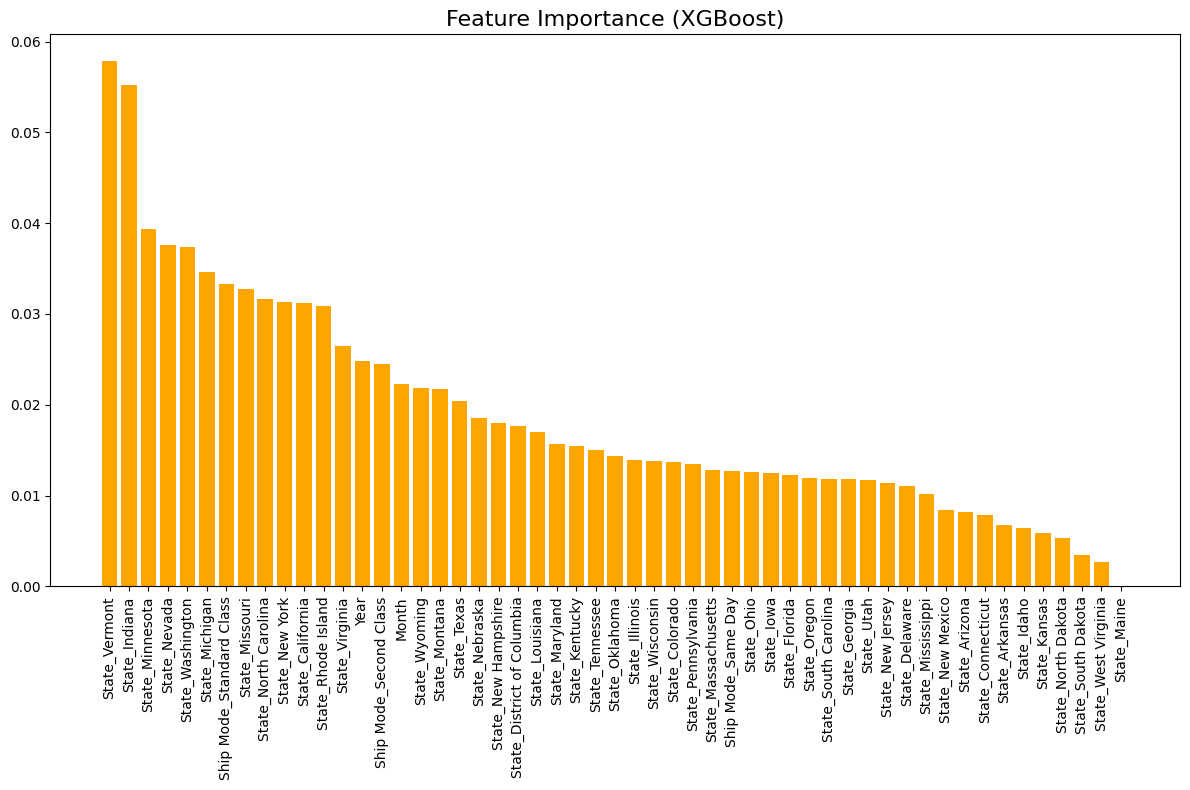

In [29]:
# Feature importance for XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_sorted_indices = np.argsort(xgb_importances)[::-1]  # Сортируем по убыванию

# visualisation
plt.figure(figsize=(12, 8))
plt.title("Feature Importance (XGBoost)", fontsize=16)
plt.bar(range(len(xgb_importances)), xgb_importances[xgb_sorted_indices], align="center", color="orange")
plt.xticks(range(len(xgb_importances)), np.array(features)[xgb_sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [30]:
'''Based on the feature importance charts for the Random Forest and XGBoost models, the following conclusions can be drawn:

Random Forest:

The most significant features are:
Weekday (day of the week), indicating the importance of weekdays in predicting sales.
Day (day of the month) and Month, highlighting the impact of seasonal and temporal factors.
Region_East, Region_South, and Region_West — regional data also contribute noticeably.
Product category, especially Category_Office Supplies, plays a substantial role in predictions.
XGBoost:

The most important features are:
State_Wisconsin and other state features, which may indicate significant regional differences in sales data.
Ship Mode_Second Class and other shipping methods, emphasizing their influence on predictions.
Weekday and Month remain important features, emphasizing temporal effects.
XGBoost handles rare categories (e.g., specific states) more effectively, as shown by the significance of a larger number of features.
Overall Conclusion:

The models emphasize different features. Random Forest focuses more on temporal features, while XGBoost highlights regional characteristics and shipping methods.
The choice of model depends on the analysis objective:
If temporal trends are crucial, Random Forest may be preferable.
If the focus is on analyzing regional specifics or the impact of shipping methods, XGBoost is a better choice.
Both models provide valuable results, but XGBoost might be more suitable for data with a large number of categorical features and rare events.'''


'Based on the feature importance charts for the Random Forest and XGBoost models, the following conclusions can be drawn:\n\nRandom Forest:\n\nThe most significant features are:\nWeekday (day of the week), indicating the importance of weekdays in predicting sales.\nDay (day of the month) and Month, highlighting the impact of seasonal and temporal factors.\nRegion_East, Region_South, and Region_West — regional data also contribute noticeably.\nProduct category, especially Category_Office Supplies, plays a substantial role in predictions.\nXGBoost:\n\nThe most important features are:\nState_Wisconsin and other state features, which may indicate significant regional differences in sales data.\nShip Mode_Second Class and other shipping methods, emphasizing their influence on predictions.\nWeekday and Month remain important features, emphasizing temporal effects.\nXGBoost handles rare categories (e.g., specific states) more effectively, as shown by the significance of a larger number of fea

In [31]:
plt.savefig('feature_importance_rf.png')  # Для Random Forest
plt.savefig('feature_importance_xgb.png')  # Для XGBoost
plt.savefig('model_comparison.png')  # Для сравнения моделей


<Figure size 640x480 with 0 Axes>

In [32]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')

joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']